# Heart Disease Dataset - EDA

This notebook performs **Exploratory Data Analysis (EDA)** on the provided heart disease dataset.

We will use only `numpy`, `pandas`, `matplotlib`, and `seaborn`. No modeling is included.

In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better plots
sns.set(style="whitegrid")
%matplotlib inline


In [6]:
# Load the dataset
df = pd.read_csv("heart.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file("heart output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████| 14/14 [00:00<00:00, 379.62it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Dataset info and summary
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
# Check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Distributions of Numerical Features

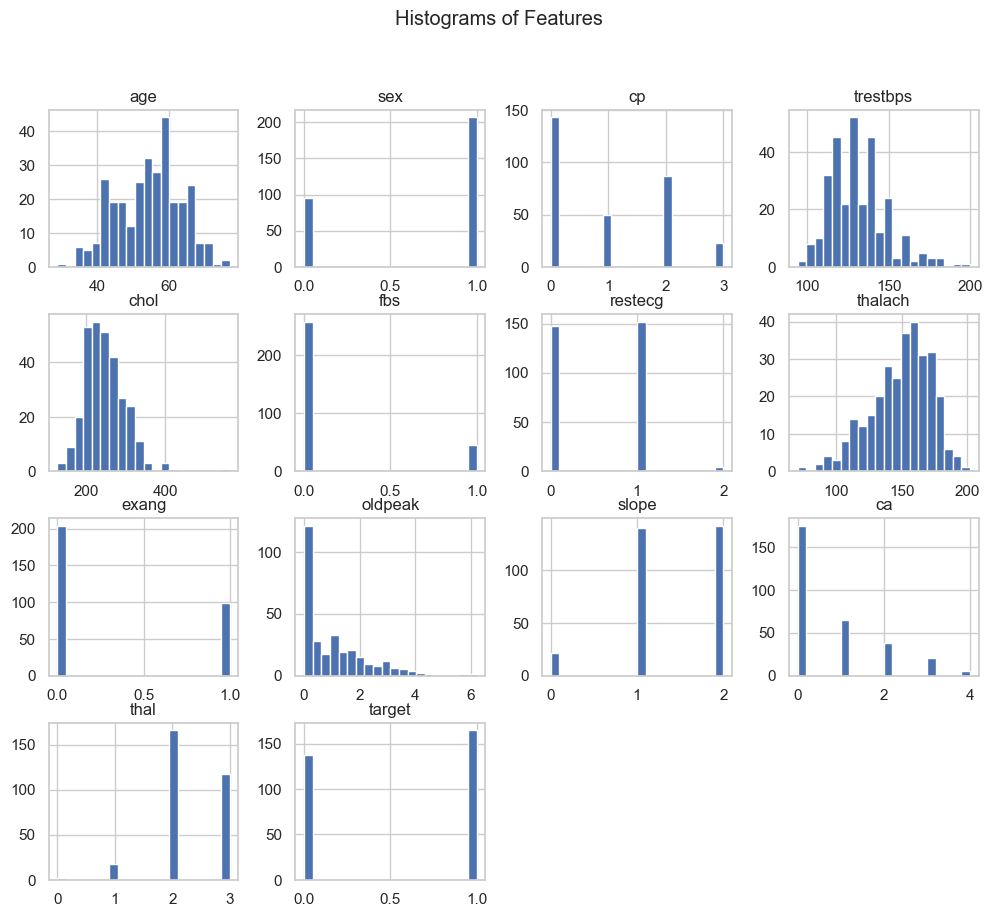

In [8]:
# Histograms for numerical columns
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Histograms of Features")
plt.show()

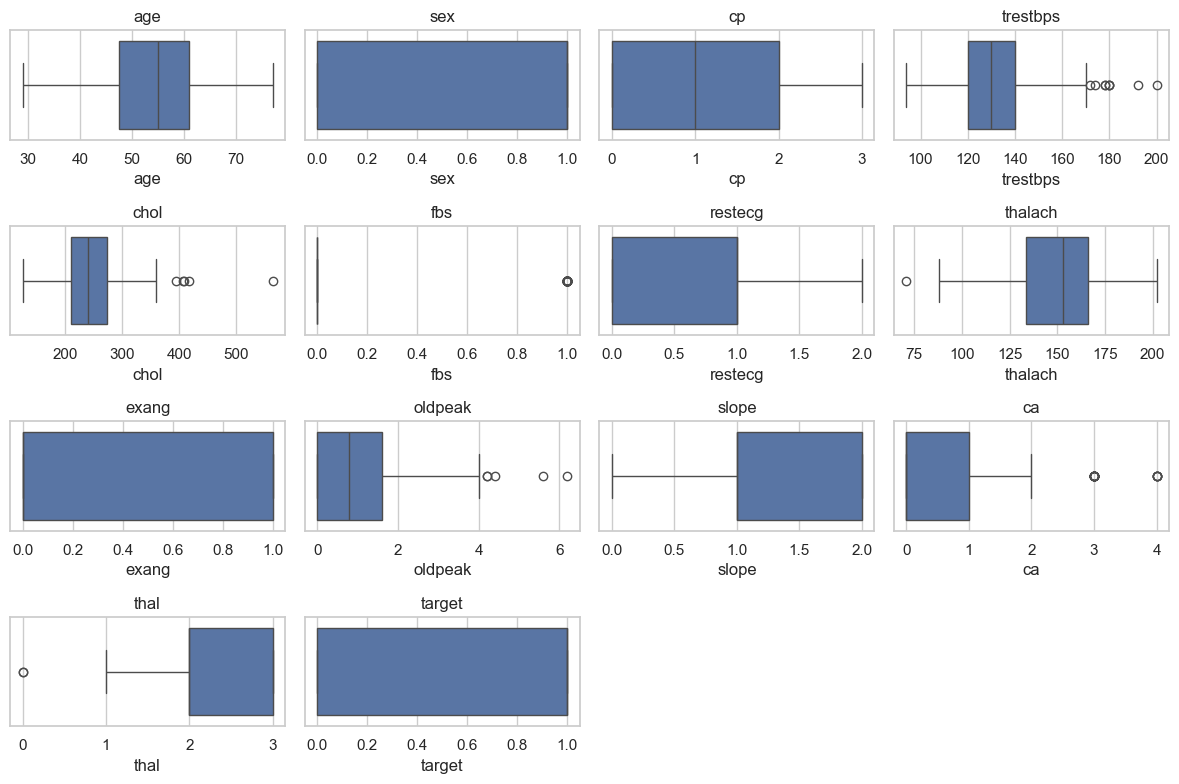

In [16]:
# Boxplots for numerical columns
plt.figure(figsize=(12,8))
for i, col in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Correlation Heatmap

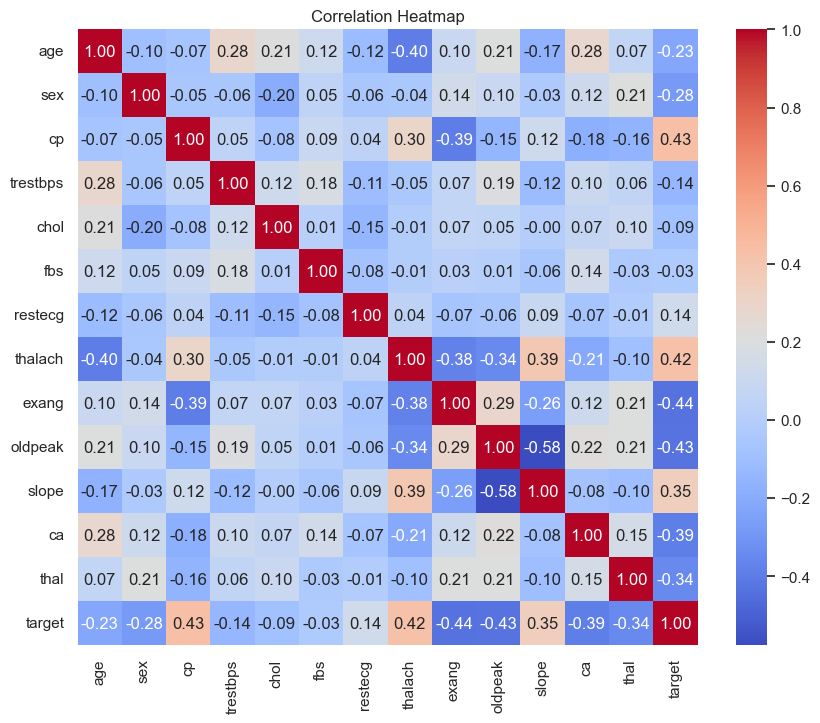

In [15]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Pairplot of Selected Features

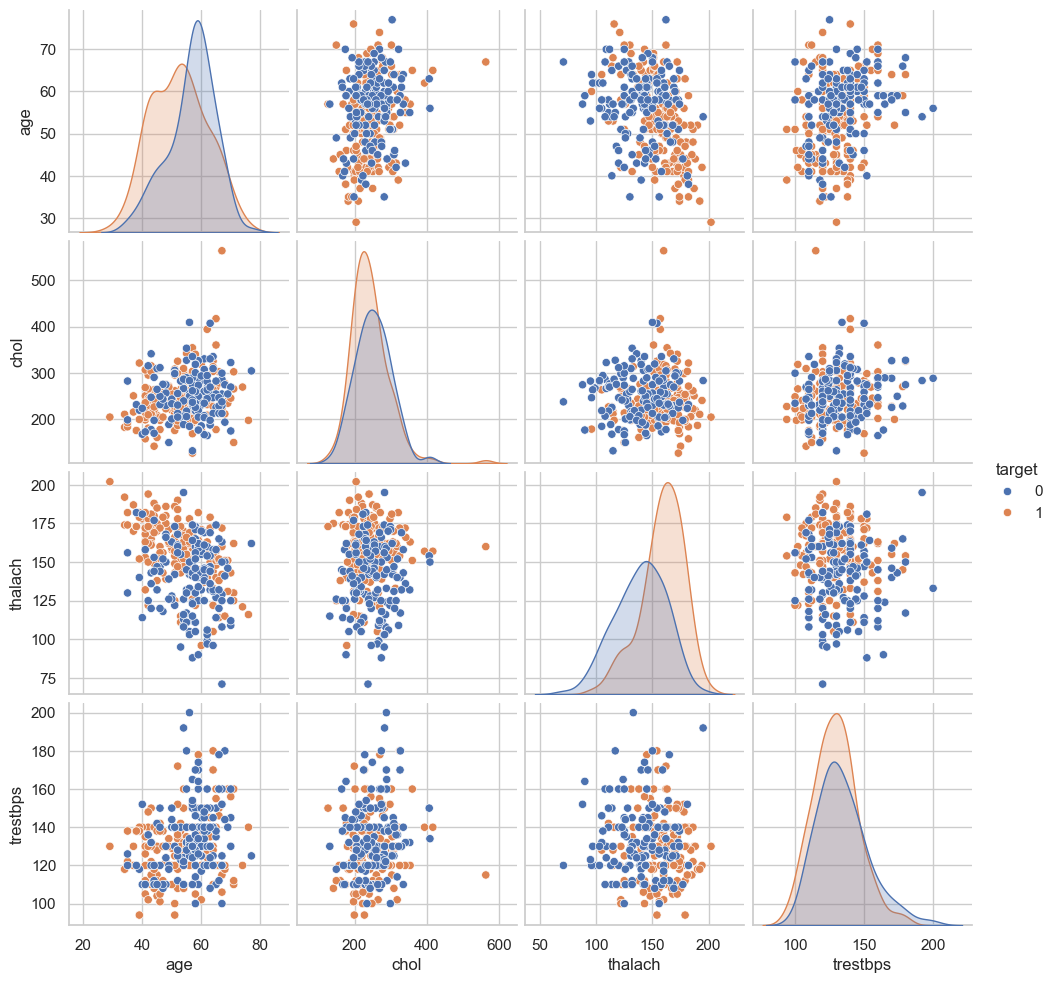

In [14]:
sns.pairplot(df[['age','chol','thalach','trestbps','target']], hue='target')
plt.show()

## Value Counts for Categorical Features

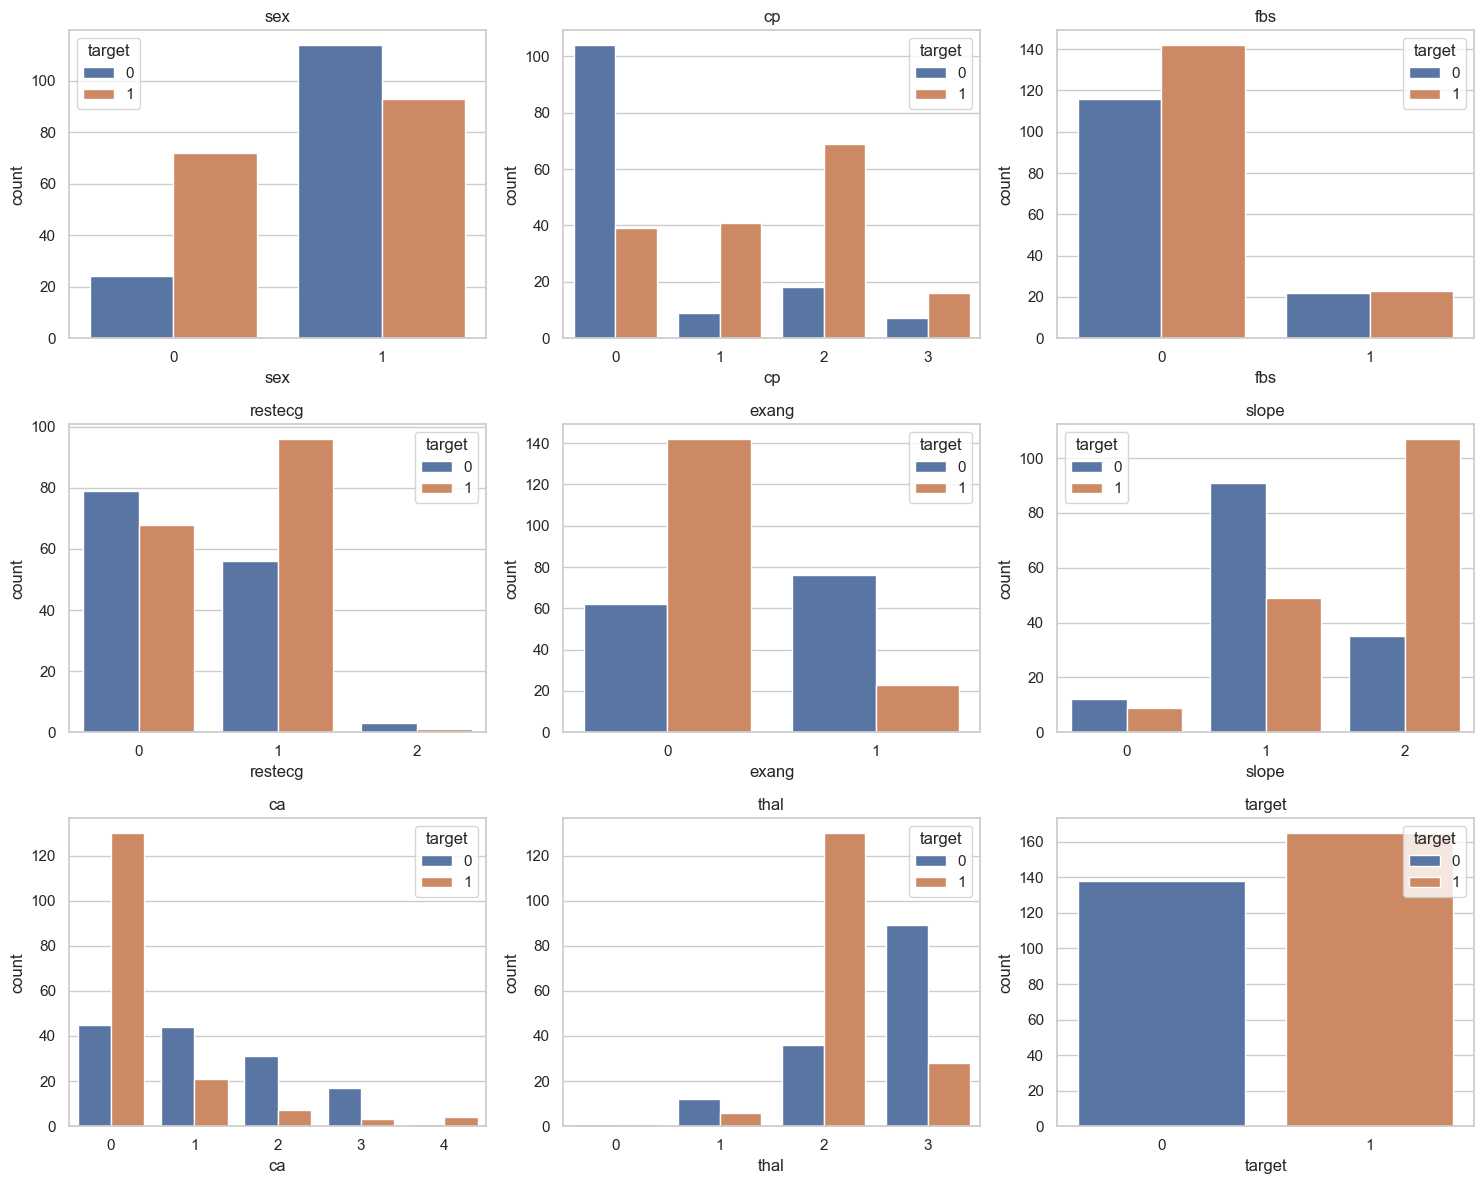

In [17]:
# Categorical features with unique values less than 10
cat_cols = [col for col in df.columns if df[col].nunique() < 10]

# Create subplots
plt.figure(figsize=(15, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot((len(cat_cols) + 2) // 3, 3, i)  # 3 columns grid
    sns.countplot(x=col, data=df, hue='target')
    plt.title(f"{col}")

plt.tight_layout()
plt.show()


## Conclusions
- The dataset has no missing values.
- Several features are categorical (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`).
- The `target` variable is balanced enough for analysis.
- Some features (like `cp`, `thalach`, `oldpeak`) show strong relationships with `target`.